In [4]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
api = wandb.Api()

/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)


In [5]:
runids = { 'B0_000003':'37t5e8ln', 'B0_00001':'3pmlbx39', 'B0_00003':'3v50zkj7', 'B0_00005':'qqi8ao1x', 'B0_0003':'2sm51tsu'}

In [6]:
import seaborn as sns
rundata = {}
runcolors = {}
runcolors2 = {}
colors =list(sns.color_palette("mako", len(runids)))
#colors = list(reversed(colors))
colors2 =list(sns.color_palette("rocket", len(runids)))
#colors2 = list(reversed(colors2))

for i, (name, ID) in enumerate(runids.items()):
    run = api.run(f"sholto/learning-from-play_v2/{ID}")
    # save the metrics for the run to a csv file
    metrics_dataframe = run.history()
    metrics_dataframe.to_csv(f"runs/{name}.csv")
    rundata[name] = pd.read_csv(f"runs/{name}.csv")
    runcolors[name] = colors[i]
    runcolors2[name] = colors2[i]

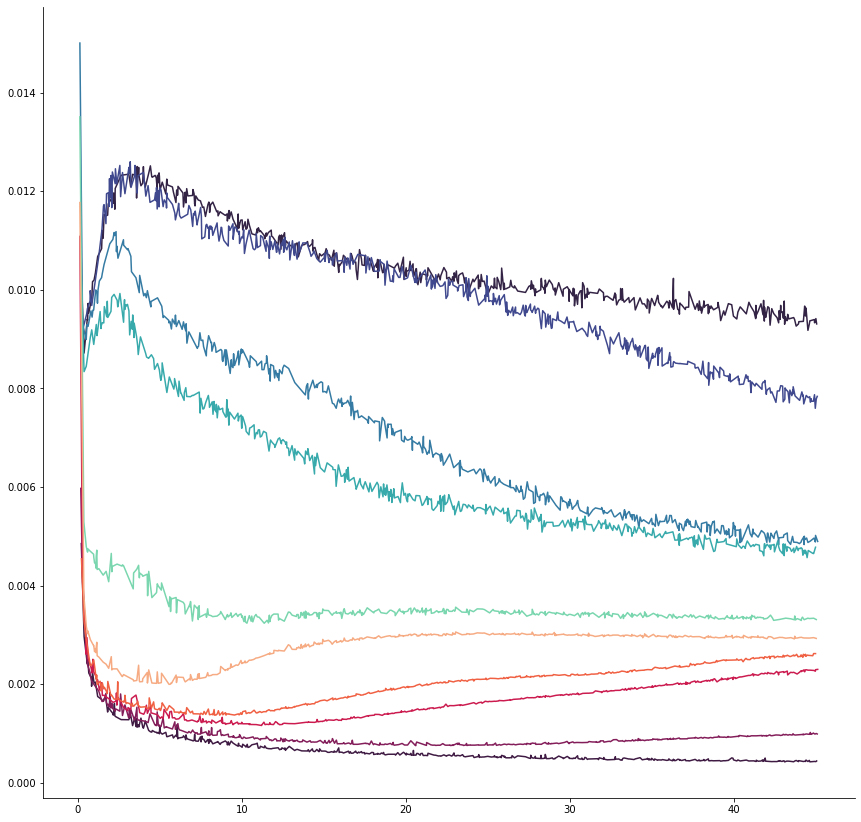

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(32, 32))

ax = fig.add_subplot(2,2, 1)
#ax2 = fig.add_subplot(2,2, 2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for name, df in rundata.items():
    time = df['_runtime']/60/60 # Hours!
    step = df['_step']
    x = time
    
    ax.plot(x,df['valid_act_with_plan_loss'], c=runcolors[name], )
    ax.plot(x,df['valid_act_with_enc_loss'], c=runcolors2[name])


In [34]:
def plot(ax, x, y,i, loss='MAE'):
    ax.clear()
    ax.plot(x, df[y][:i])
    ax.set_title(y.replace('_'," ").title())
    ax.set_xlabel('Hours')
    ax.set_ylabel(loss)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

<IPython.core.display.Javascript object>


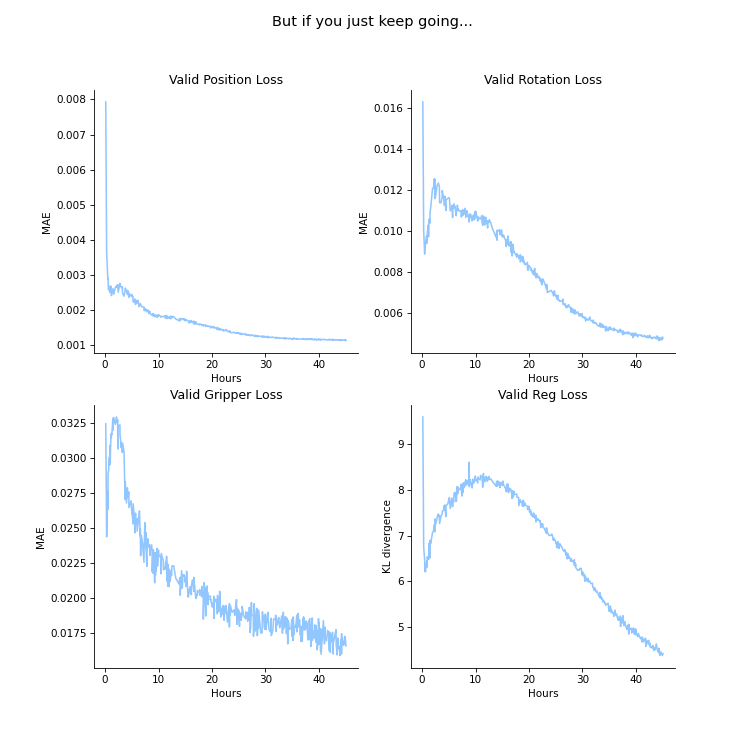

In [35]:
#importing libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

df = rundata['B0_00003']

fig = plt.figure(figsize=(10, 10),dpi=100)
#creating a subplot 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

t = list(np.linspace(1,50, 5))+list(np.linspace(50,60, 30))+list(np.linspace(90,500, 20))
def animate(i):
    i = int(t[i])
    x= time = df['_runtime'][:i]/60/60 # Hours!
    plot(ax1, x, 'valid_position_loss',i)
    plot(ax2, x, 'valid_rotation_loss',i)
    plot(ax3, x, 'valid_gripper_loss',i)
    plot(ax4, x, 'valid_reg_loss',i, loss = 'KL divergence')

    if np.max(x) > 6 and np.max(x) < 9:
        fig.suptitle('This is typically where Colab times out on an overnight run, \n mildly promising?', fontsize=14)
    elif np.max(x) > 9:
        fig.suptitle('But if you just keep going... ', fontsize=14)
    else:
        fig.suptitle(' ', fontsize=16)
    
ani = animation.FuncAnimation(fig, animate, frames =len(t), interval=200)


In [36]:
writergif = animation.PillowWriter(fps=10) 
ani = animation.FuncAnimation(fig, animate, frames =len(t), interval=200, repeat=False) 
ani.save('convergence.gif', writer=writergif)

<IPython.core.display.Javascript object>


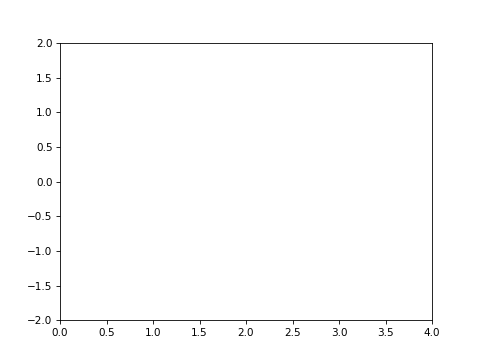

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [3]:
anim